29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


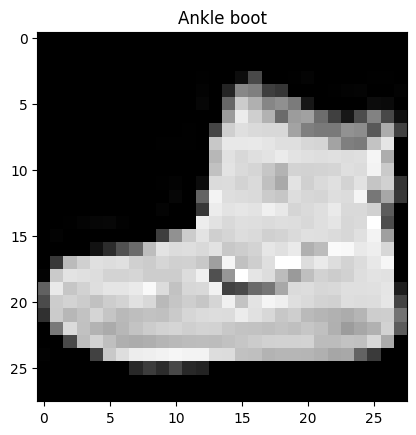

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# تحميل البيانات
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# تطبيع القيم لتكون بين 0 و 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# إعادة تشكيل الصور (إضافة قناة واحدة لأن الصور أبيض وأسود)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# أسماء الفئات
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# عرض مثال من البيانات
plt.imshow(x_train[0].reshape(28,28), cmap="gray")
plt.title(class_names[y_train[0]])
plt.show()


In [ ]:
from tensorflow.keras import layers, models

# بناء النموذج (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # لتقليل overfitting
    layers.Dense(10, activation='softmax')
])

# تجميع النموذج
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# تدريب النموذج
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7242 - loss: 0.7623 - val_accuracy: 0.8695 - val_loss: 0.3646
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8621 - loss: 0.3886 - val_accuracy: 0.8856 - val_loss: 0.3120
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8805 - loss: 0.3304 - val_accuracy: 0.8984 - val_loss: 0.2849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8944 - loss: 0.2934 - val_accuracy: 0.9034 - val_loss: 0.2668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9028 - loss: 0.2632 - val_accuracy: 0.9047 - val_loss: 0.2632
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9083 - loss: 0.2461 - val_accuracy: 0.9040 - val_loss: 0.2656
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9141 - loss: 0.2300 - val_accuracy: 0.9113 - val_loss: 0.2531
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9176 - loss: 0.2221

In [ ]:
# حفظ النموذج
model.save("best_model.h5")
print("✅ Model saved as best_model.h5")


✅ Model saved as best_model.h5


In [7]:
from google.colab import files
files.download("best_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>